In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import logomaker
import pickle
import os
import glob

In [5]:
def get_information_content(x):
    ic = x * np.log2((x + .001) / .25)
    if ic > 0:
        return(ic)
    else:
        return(0.0)

In [27]:
def trim_to_w(ppm, new_w=30):
    old_w = ppm.shape[0]
    ic = ppm.applymap(get_information_content)
    ic = ic.sum(axis=1).values
    avg_ics = [np.mean(ic[i:i+new_w]) for i in range(old_w - new_w + 1)]
    return(ppm[np.argmax(avg_ics):np.argmax(avg_ics)+new_w])

In [18]:
TFs = os.listdir("./data/CHS/")
TFs

['GABPA', 'PRDM5', 'SP140', 'ZNF362', 'ZNF407']

In [19]:
def get_ppm(resultsPkl):
    with open(resultsPkl, "rb") as f:
        data = pickle.load(f)

        AUCs = [data[_]["auc"] for _ in data]
        for i in np.argsort(AUCs)[::-1]:
            ppm = data[i]["ppm"]
            ppm = pd.DataFrame(ppm, columns=["A", "C", "G", "T"])
            # ppm = trim_to_w(ppm)
            break
    return(ppm)

In [20]:
resultsDir = "./Results/"
resultsFiles = sorted(glob.glob(resultsDir + "*pkl"))

In [21]:
# get_ppm(resultsFiles[0])

In [34]:
PPMs = [trim_to_w(get_ppm(_)) for _ in resultsFiles]

In [35]:
accList = [os.path.basename(_).split(".")[0] for _ in resultsFiles]

In [36]:
PPMs = dict(zip(accList, PPMs))

In [37]:
assays = ["Both", "All", "CHS", "GHTS-C2", "GHTS-C3", "GHTS-C4"]

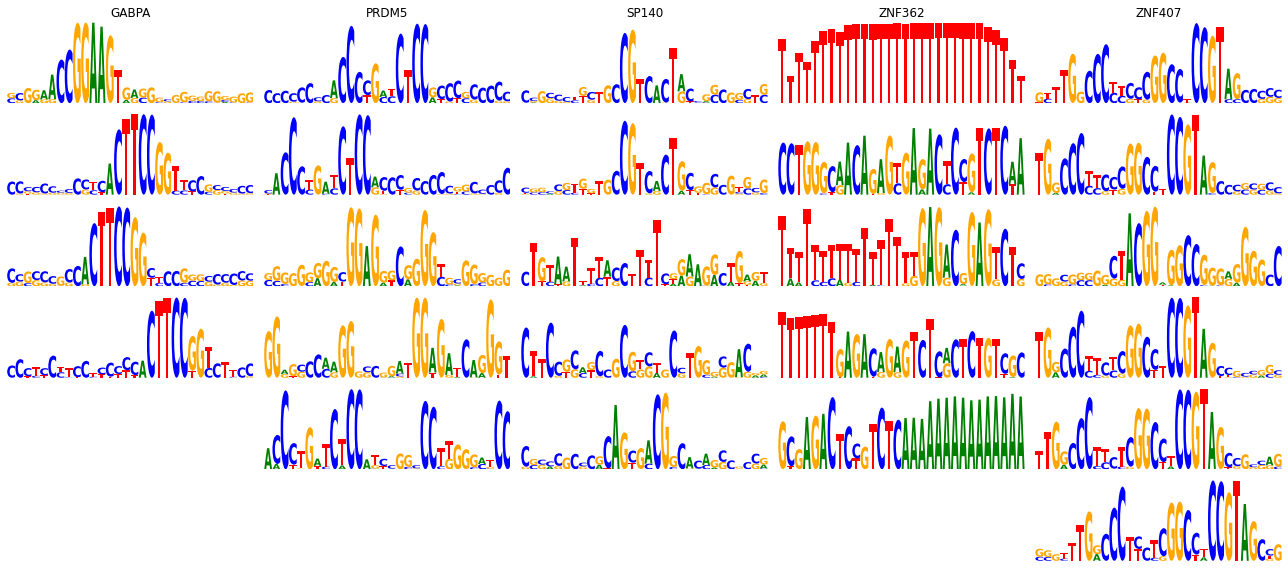

In [38]:
fig, axes = plt.subplots(6, 5, figsize=(18,8), tight_layout=True)
for i, TF in enumerate(TFs):
    for j, assay in enumerate(assays):
        ax = axes[j,i]
        if i == 0:
            ax.set_ylabel(assay)
        acc = TF + "-" + assay
        if acc in PPMs:
            ppm = PPMs[acc]
            logomaker.Logo(ppm.applymap(get_information_content), ax=ax)
            ax.set_ylim([0,2])
            ax.axis("off")
            if j == 0:
                ax.set_title(TF)
        else:
            fig.delaxes(ax)

In [42]:
with open("Submission-44.txt", "w") as f:
    for i, TF in enumerate(TFs):
        for j, assay in enumerate(assays):
            acc = TF + "-" + assay
            if acc in PPMs:
                ppm = PPMs[acc]
                print(">{0} {0}_motif{1}".format(TF, j), file=f)
                for i in range(ppm.shape[0]):
                    print("\t".join(["%.5f" % v for v in ppm.values[i,:]]), file=f)
                print(file=f)

In [43]:
!cat Submission-44.txt | head

>GABPA GABPA_motif0
0.19259	0.32267	0.33064	0.15411
0.22082	0.35496	0.29322	0.13100
0.20415	0.22443	0.44718	0.12424
0.29607	0.19232	0.39364	0.11797
0.37872	0.21286	0.30611	0.10231
0.54268	0.10336	0.30973	0.04423
0.10021	0.71283	0.18194	0.00503
0.19277	0.79476	0.01023	0.00224
0.00219	0.00035	0.99679	0.00066


In [48]:
ppm = pd.read_csv("sleepy-malachite-buzzard.txt", sep=" ", skiprows=1, names=["A", "C", "G", "T"])
ppm.head()

,A,C,G,T
0,0.09391,0.15145,0.51648,0.23816
1,0.11778,0.50745,0.24568,0.12910
2,0.01270,0.94761,0.01369,0.02600
3,0.00793,0.00912,0.97581,0.00714
4,0.01229,0.15325,0.27657,0.55789


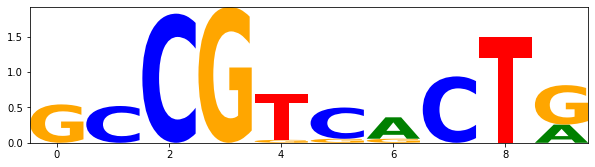

In [49]:
logomaker.Logo(ppm.applymap(get_information_content))

In [ ]:
q